# Calculo multidimensional Parte II
## Curvas en el espacio
Un ejemplo simple, la helice (helix)


$$ \begin{pmatrix} a \cos t \\ b \sin t \\ ct \end{pmatrix}.$$
Si $a=b$ la helice es circular, sino, es eliptica

In [ ]:
import sympy as sp
from sympy import Matrix, symbols, diff
t = symbols('t')

a,b,c=symbols('a b c ', constant=True)
r = Matrix( [ a*sp.cos(t), b*sp.sin(t), c*t])
r

Matrix([
[a*cos(t)],
[b*sin(t)],
[     c*t]])

In [ ]:
# graficamos
myHelix = r.subs( [(a,2), (b,3), (c,5)])
myHelix

Matrix([
[2*cos(t)],
[3*sin(t)],
[     5*t]])

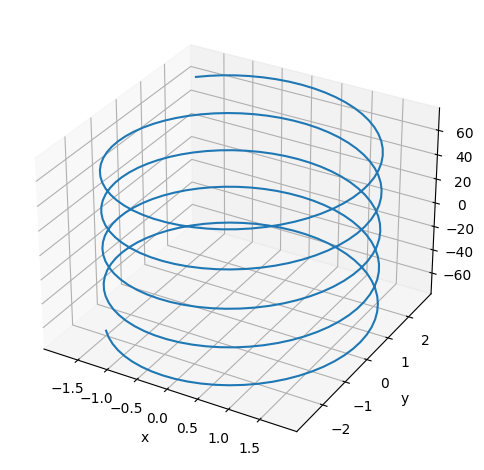

In [ ]:
from sympy.plotting import plot3d_parametric_line
plot3d_parametric_line( myHelix[0], myHelix[1], myHelix[2], (t,-15,15))

In [ ]:
diff(r,t)

Matrix([
[-a*sin(t)],
[ b*cos(t)],
[        c]])

Problema: Halle el angulo entre la velocidad y la aceleracion
Recuerden que $v=\dot{r}$, $a=\ddot{r}$.
donde
$$ v= \dot{r} = \frac{dr}{dt} .$$
$$ a= \ddot{r} = \frac{d^2r}{dt^2}.$$

El coseno del angulo entre dos vectores esta dado por

$$\cos \theta = \frac{v \cdot a}{\| v \| \| a \|} .$$

In [ ]:
v=diff(r,t)
acc= diff(v,t)
# a= diff(r,t,t)
# a= diff(r,t,2)

cost= v.dot(acc)/(sp.sqrt(v.dot(v) * acc.dot(acc)))
cost

(a**2*sin(t)*cos(t) - b**2*sin(t)*cos(t))/sqrt((a**2*cos(t)**2 + b**2*sin(t)**2)*(a**2*sin(t)**2 + b**2*cos(t)**2 + c**2))

In [ ]:
theta = sp.acos(cost)
theta

acos((a**2*sin(t)*cos(t) - b**2*sin(t)*cos(t))/sqrt((a**2*cos(t)**2 + b**2*sin(t)**2)*(a**2*sin(t)**2 + b**2*cos(t)**2 + c**2)))

In [ ]:
# pudimos haber usado la norma
cost = v.dot(acc)/(v.norm()*acc.norm())
cost

(a**2*sin(t)*cos(t) - b**2*sin(t)*cos(t))/(sqrt(Abs(a*cos(t))**2 + Abs(b*sin(t))**2)*sqrt(Abs(c)**2 + Abs(a*sin(t))**2 + Abs(b*cos(t))**2))

In [ ]:
theta.subs(a,b)

pi/2

In [ ]:
# para graficar sustituimos
thetat = theta.subs( [(a,2), (b,1), (c,1)])
thetat

acos(3*sin(t)*cos(t)/sqrt((sin(t)**2 + 4*cos(t)**2)*(4*sin(t)**2 + cos(t)**2 + 1)))

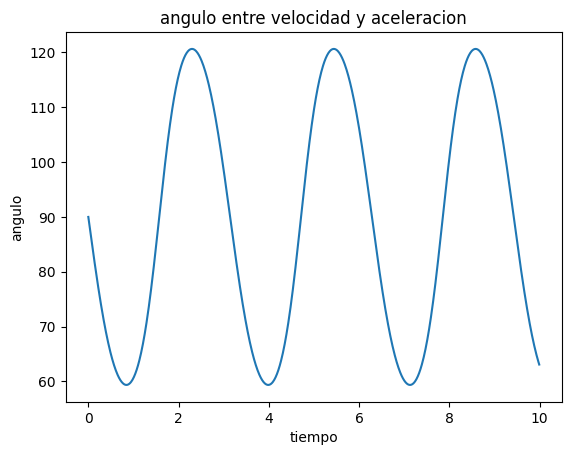

In [ ]:
# graficamos
from sympy import lambdify
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

domain = np.arange(0, 10, 0.01)

# lambdify
thetaL = lambdify( [t], thetat)(domain)



plt.title("angulo entre velocidad y aceleracion")
plt.xlabel("tiempo")
plt.ylabel("angulo")


plt.plot(domain, thetaL*180/pi) # en grados

plt.show()

### Actividad #1
Dada una curva en 2D $(x(t), y(t))$, la curvatura esta definida
como

$$ \kappa = \frac{\dot{x} \ddot{y} - \dot{y} \ddot{x}}{(\dot{x}^2 + \dot{y}^2)^{3/2}} .$$

Muestr que la curvatura de una particula que viaja en una trayectoria circular es $1/R$ donde $R$ es el radio del circulo.

## Vector Tangente
Por definicion el vector tangente es

$$T(t) = \frac{\dot{r}(t)}{\| \dot{r}(t) \|} .$$

Note que se normalizo y el vector tangente es, tangente a la trayectoria  y ademas unitario. Calcumemos este vector en `SymPy`.

In [ ]:
from sympy import Function
t = symbols('t', real=True)
x = Function('x', real=True)(t)
y = Function('y', real=True)(t)
z = Function('z', real=True)(t)

r = Matrix( [x,y,z])
r



Matrix([
[x(t)],
[y(t)],
[z(t)]])

In [ ]:
velocity = diff(r,t)
display(velocity)
T=velocity/(sp.sqrt( velocity.dot(velocity)))
T

Matrix([
[Derivative(x(t), t)],
[Derivative(y(t), t)],
[Derivative(z(t), t)]])

Matrix([
[Derivative(x(t), t)/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)],
[Derivative(y(t), t)/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)],
[Derivative(z(t), t)/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)]])

### Actividad 2.
Simplifique la expresion anterior, sacando factor comun.

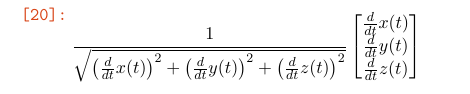

## Vector Normal
El vector normal, por definicion,

$$ N = \frac{\dot{T}}{\| \dot{T} \|} .$$

In [ ]:
D = diff(T,t)
D/D.norm()

Matrix([
[((-Derivative(x(t), t)*Derivative(x(t), (t, 2)) - Derivative(y(t), t)*Derivative(y(t), (t, 2)) - Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(x(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) + Derivative(x(t), (t, 2))/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2))/sqrt(Abs((Derivative(x(t), t)*Derivative(x(t), (t, 2)) + Derivative(y(t), t)*Derivative(y(t), (t, 2)) + Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(x(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) - Derivative(x(t), (t, 2))/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2))**2 + Abs((Derivative(x(t), t)*Derivative(x(t), (t, 2)) + Derivative(y(t), t)*Derivative(y(t), (t, 2)) + Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(y(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) - Derivative(y(t), (t, 2))/

Que hacer con cosas como esta?

Dos metodos

1.0 Uno

In [ ]:
from sympy import radsimp
Dt = diff(T, t)
N2 = 1/sp.sqrt(Dt.dot(Dt))
N= sp.MatMul(N2, Dt)
N

1/sqrt(((-Derivative(x(t), t)*Derivative(x(t), (t, 2)) - Derivative(y(t), t)*Derivative(y(t), (t, 2)) - Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(x(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) + Derivative(x(t), (t, 2))/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2))**2 + ((-Derivative(x(t), t)*Derivative(x(t), (t, 2)) - Derivative(y(t), t)*Derivative(y(t), (t, 2)) - Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(y(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) + Derivative(y(t), (t, 2))/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2))**2 + ((-Derivative(x(t), t)*Derivative(x(t), (t, 2)) - Derivative(y(t), t)*Derivative(y(t), (t, 2)) - Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(z(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) + Derivative(z(t), (t, 2))/sqrt(De

2.0 Dos

In [ ]:
# rapidez
v = sp.diff(r,t)
S = symbols('S', real=True)
S = sp.sqrt( v.dot(v))
S
V=S

In [ ]:
Ns = N.subs(V,S)
Ns

1/sqrt(((-Derivative(x(t), t)*Derivative(x(t), (t, 2)) - Derivative(y(t), t)*Derivative(y(t), (t, 2)) - Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(x(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) + Derivative(x(t), (t, 2))/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2))**2 + ((-Derivative(x(t), t)*Derivative(x(t), (t, 2)) - Derivative(y(t), t)*Derivative(y(t), (t, 2)) - Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(y(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) + Derivative(y(t), (t, 2))/sqrt(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2))**2 + ((-Derivative(x(t), t)*Derivative(x(t), (t, 2)) - Derivative(y(t), t)*Derivative(y(t), (t, 2)) - Derivative(z(t), t)*Derivative(z(t), (t, 2)))*Derivative(z(t), t)/(Derivative(x(t), t)**2 + Derivative(y(t), t)**2 + Derivative(z(t), t)**2)**(3/2) + Derivative(z(t), (t, 2))/sqrt(De

Luego les comparto mi cuaderno. Por mas que se simplifique las expresiones siguen siendo monstruosas. Estas expresiones se simplifican mucho cuando se tienen funciones esficificas. Por ejemplo en un helice.

## Vector **binormal**

$$ B = \frac{T \times N}{ \| T \times N \|} .$$
Por la complejidad de las expresiones analiticas no la voy a calcular.
Actividad para otra oportunidad. Calcular lo vectores, tangente, normal y binormal en una helice.

* $a\ne b$
* $a= b$


## Longitudde Arco.
Esta se calcula con integrales,

Sea

$$h(t) = \begin{pmatrix} a \sin t \\ b \cos t \\ ct\end{pmatrix} .$$
Encontramos que


$$ \int h(t) dt = \begin{pmatrix} -a \cos t \\ b \sin t \\ c t^2/2\end{pmatrix}  .$$

In [ ]:
t= symbols('t', real=True)
a,b,c = symbols('a b c', constant=True)
r= Matrix( [a*sp.sin(t), b*sp.cos(t), c*t])
r

Matrix([
[a*sin(t)],
[b*cos(t)],
[     c*t]])

In [ ]:
from sympy import integrate
integrate(r,t)

Matrix([
[-a*cos(t)],
[ b*sin(t)],
[ c*t**2/2]])

La longitud de arco de una curva diferenciable esta dada por

$$ s = \int_a^b \sqrt{\dot{x}^2 + \dot{y}^2 + \dot{z}^2 } dt .$$

Actividad no para esta clase. Halle la longitud de arco entre $t=0$ y $t=4$ en una helice. Use $a=b=c=1$, que pasa si $a \ne b$.

### Ejemplo: La curvatura de un espiral
La definicion de curvatura en terminos de $t$ y $r$ es


$$\kappa = \frac{\| \dot{T} \|}{\| \dot{r} \|} .$$

Consideremos la siguiente curva

$$( \sin t \varphi^{t/\pi} ,\cos t  \varphi^{t/\pi}) .$$

In [ ]:
from sympy import GoldenRatio
varphi=GoldenRatio
varphi.evalf()

1.61803398874989

In [ ]:
from sympy import Rational
t = symbols('t', real=True)
R = symbols('R', constant = True)

r = Matrix( [sp.sin(t)*varphi**(t/sp.pi), sp.cos(t)*varphi**(t/sp.pi)])
r

Matrix([
[GoldenRatio**(t/pi)*sin(t)],
[GoldenRatio**(t/pi)*cos(t)]])

In [ ]:
v = diff(r, t)
S = sp.sqrt(v.dot(v)) # S=speed
display(v, S)

Matrix([
[ GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t/pi)*cos(t)],
[-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi]])

sqrt((-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)**2 + (GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t/pi)*cos(t))**2)

In [42]:
T = v/S
DTDt = diff(T, t)
DTDtn = DTDt.norm()
kappa = DTDtn/S
kappa

sqrt(Abs((-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)*(-(-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)*(-4*GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi - 2*GoldenRatio**(t/pi)*cos(t) + 2*GoldenRatio**(t/pi)*log(GoldenRatio)**2*cos(t)/pi**2)/2 - (GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t/pi)*cos(t))*(-2*GoldenRatio**(t/pi)*sin(t) + 2*GoldenRatio**(t/pi)*log(GoldenRatio)**2*sin(t)/pi**2 + 4*GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)/2)/((-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)**2 + (GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t/pi)*cos(t))**2)**(3/2) + (-2*GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi - GoldenRatio**(t/pi)*cos(t) + GoldenRatio**(t/pi)*log(GoldenRatio)**2*cos(t)/pi**2)/sqrt((-GoldenRatio**(t/pi)*sin(t) + GoldenRatio**(t/pi)*log(GoldenRatio)*cos(t)/pi)**2 + (GoldenRatio**(t/pi)*log(GoldenRatio)*sin(t)/pi + GoldenRatio**(t

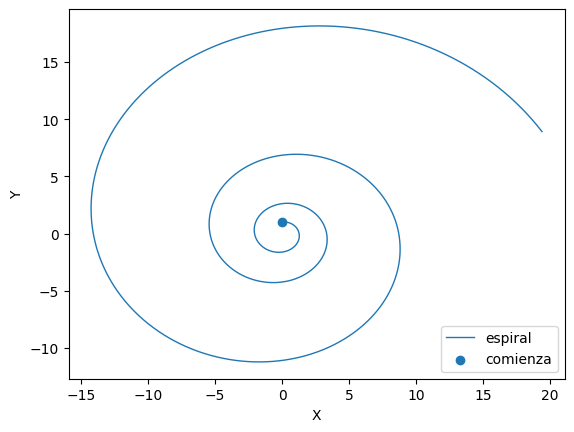

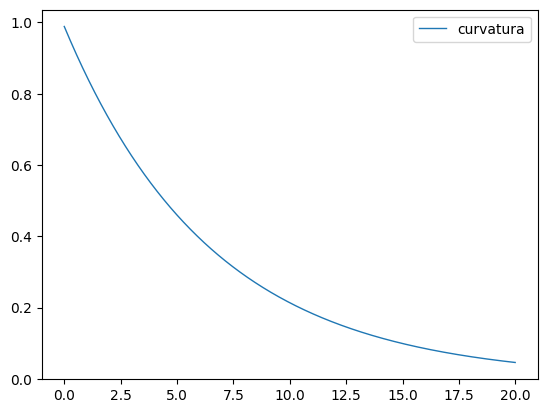

In [44]:
# plot
import matplotlib.pyplot as plt
import numpy as np
from sympy import lambdify

# preparamos los arreglos x, y, z
w = np.arange(0, 20, 0.01)
x = lambdify(t, r[0])
y = lambdify(t, r[1])
k = lambdify(t, kappa)

# etiquetas
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x(w), y(w), label='espiral', linewidth=1)
plt.scatter( x(0), y(0), label='comienza', linewidth=1)
plt.legend()

plt.show()


# curvatura
plt.plot( w, k(w), label="curvatura", linewidth=1)
plt.legend()
plt.show()

